In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import pickle, os


In [9]:
import holoviews as hv
hv.notebook_extension()

In [10]:
# SUPER SLOOOOOW ~ 10-20 minutes to load
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta") # 

In [11]:
BES_Panel= pd.read_pickle("BES_gEV_wave_weights.pkl")

b":HoloMap   [wave]\n   :ItemTable   (I would not vote,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,Other,Don't know)"
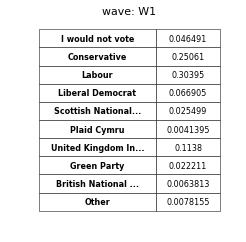
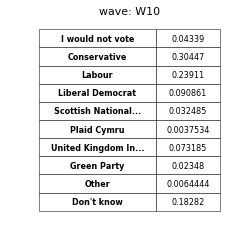
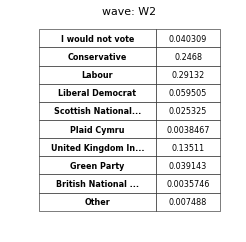
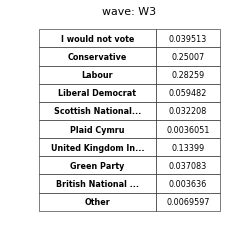
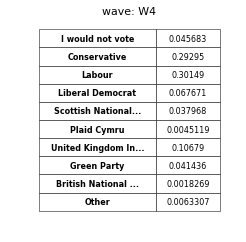
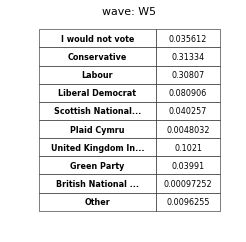
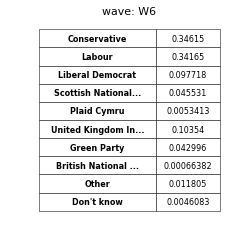
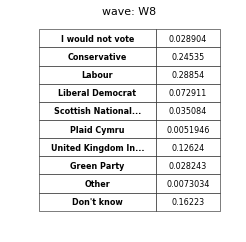

In [12]:
tables = hv.HoloMap(kdims=['wave'])
for wave in ["W1","W2","W3","W4","W5","W6","W8","W10"]:

    vdims = BES_Panel["generalElectionVote"+ wave].cat.categories
    crosstab = pd.crosstab(index   = BES_Panel["generalElectionVote"+wave],
                     columns = BES_Panel["wave" + wave.replace("W","")],
                     values  = BES_Panel["wt_full_"+wave],
                     aggfunc = sum,
                     normalize=True)    

    tables[wave] = hv.ItemTable( zip( vdims, tuple(crosstab[1.0][vdims].values) ) )
    
tables

In [13]:
BES_Panel.dtypes

generalElectionVoteW1     category
wave1                      float64
wt_full_W1                 float64
generalElectionVoteW2     category
wave2                      float64
wt_full_W2                 float64
generalElectionVoteW3     category
wave3                      float64
wt_full_W3                 float64
generalElectionVoteW4     category
wave4                      float64
wt_full_W4                 float64
generalElectionVoteW5     category
wave5                      float64
wt_full_W5                 float64
generalElectionVoteW6     category
wave6                      float64
wt_full_W6                 float64
generalElectionVoteW8     category
wave8                      float64
wt_full_W8                 float64
generalElectionVoteW10    category
wave10                     float64
wt_full_W10                float64
dtype: object

In [15]:
# how to get the list of categories for a category dtype (order matters here for indexing!)
BES_Panel.generalElectionVoteW1.cat.categories

Index(['I would not vote', 'Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru',
       'United Kingdom Independence Party (UKIP)', 'Green Party',
       'British National Party (BNP)', 'Other', 'Don't know'],
      dtype='object')

In [16]:
# how to turn category dtype into integer (index to the category list above) type
BES_Panel.generalElectionVoteW1.cat.codes

0         2
1         1
2         2
3         1
4         1
5         2
6         6
7         6
8         2
9         1
10        1
11        6
12        1
13        1
14       -1
15        7
16        1
17        4
18        2
19        6
20        1
21        3
22        6
23       10
24        6
25        0
26        6
27        3
28        6
29        1
         ..
64659    -1
64660    -1
64661    -1
64662    -1
64663    -1
64664    -1
64665    -1
64666    -1
64667    -1
64668    -1
64669    -1
64670    -1
64671    -1
64672    -1
64673    -1
64674    -1
64675    -1
64676    -1
64677    -1
64678    -1
64679    -1
64680    -1
64681    -1
64682    -1
64683    -1
64684    -1
64685    -1
64686    -1
64687    -1
64688    -1
dtype: int8

In [18]:
# how to turn a column of <some dtype> into category dtype
BES_Panel.generalElectionVoteW1.cat.codes.astype('category')

0         2
1         1
2         2
3         1
4         1
5         2
6         6
7         6
8         2
9         1
10        1
11        6
12        1
13        1
14       -1
15        7
16        1
17        4
18        2
19        6
20        1
21        3
22        6
23       10
24        6
25        0
26        6
27        3
28        6
29        1
         ..
64659    -1
64660    -1
64661    -1
64662    -1
64663    -1
64664    -1
64665    -1
64666    -1
64667    -1
64668    -1
64669    -1
64670    -1
64671    -1
64672    -1
64673    -1
64674    -1
64675    -1
64676    -1
64677    -1
64678    -1
64679    -1
64680    -1
64681    -1
64682    -1
64683    -1
64684    -1
64685    -1
64686    -1
64687    -1
64688    -1
dtype: category
Categories (12, int64): [-1, 0, 1, 2, ..., 7, 8, 9, 10]